Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [8]:
gold_dataset = pd.read_csv("/content/gld_price_data.csv") #loading the csv file

In [9]:
gold_dataset.head() #first 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_dataset.tail() #last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_dataset.shape #number of rows and column

(2290, 6)

In [12]:
gold_dataset.info() #more info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_dataset.isnull().sum() #checking the number of missing values

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [14]:
gold_dataset.describe() #stats measures

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

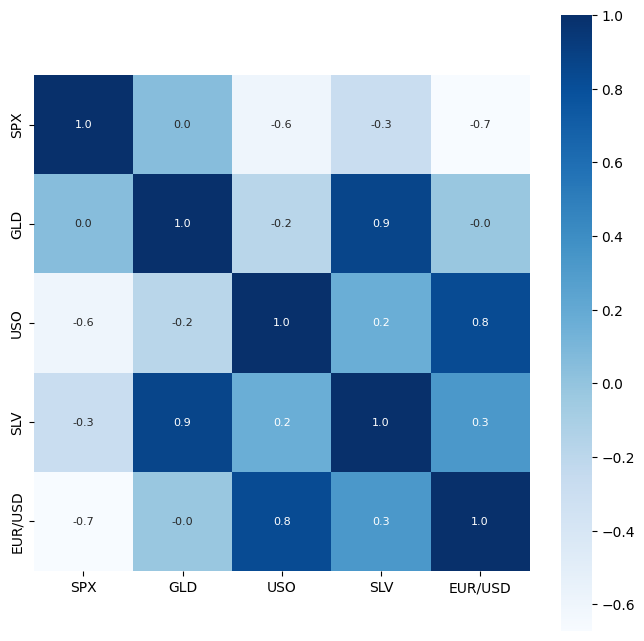

In [15]:
numeric_data = gold_dataset.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-96ec43fc91a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

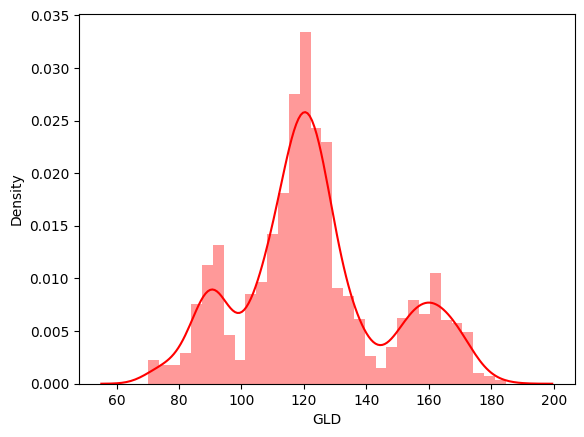

In [17]:
sns.distplot(gold_dataset['GLD'],color='red')

Splitting : Features & Target

In [18]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Dividing into Training Data & Testing Data

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 ,random_state = 2)

Model Training : Random Forest Regressor

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Evaluation Of Model

In [24]:
test_prediction = regressor.predict(X_test)

In [25]:
print(test_prediction)

[168.89869951  82.08759987 115.93020023 127.43340089 120.85070079
 154.81299743 150.51369899 126.23310027 117.40709882 125.86690038
 116.47910098 171.44520078 142.06909911 168.1023982  115.14680014
 117.53240047 138.21960312 170.18480035 159.22780326 157.09729983
 155.05189997 125.36350048 176.11669962 157.19990343 125.32530007
  93.65570013  78.07760004 120.52519994 119.03329889 167.43749894
  88.2490002  125.36239992  91.10160086 117.62100047 121.09269903
 136.1336005  115.51540149 114.95220065 146.56029973 107.30090066
 104.2258026   87.13899781 126.39120061 118.02940016 152.53419875
 119.53350022 108.46299996 108.13929882  93.20760063 127.11029755
  74.33770054 113.68929948 121.14570009 111.20859973 118.89169903
 120.68669943 159.13620063 166.90350159 146.94539671  85.77129848
  94.38020035  86.87179884  90.58590048 119.19400041 126.4456005
 127.50159974 168.93689996 122.31589896 117.47539859  98.43330023
 168.46270156 143.10239751 132.23560298 121.26630229 121.16389946
 119.757800

In [26]:
error_score = metrics.r2_score(Y_test,test_prediction)
print(error_score) #R-SQUARED ERROR

0.9889693457365895


Compare the actual and predicted values

In [27]:
Y_test = list(Y_test)

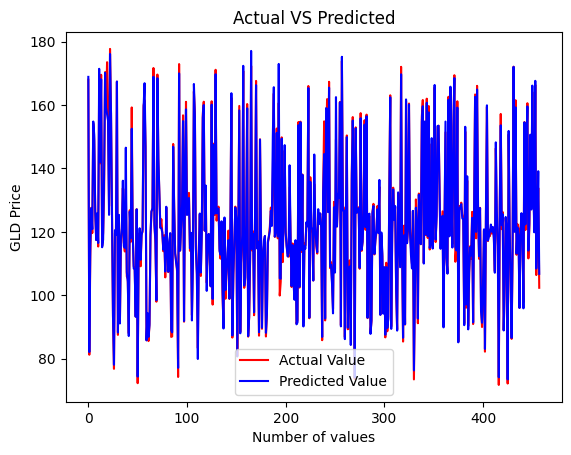

In [28]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_prediction,color='blue',label='Predicted Value')
plt.title('Actual VS Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()